In [1]:
import h5py
import numpy as np
from tqdm.notebook import tqdm
import os
import glob
import matplotlib.pyplot as plt
import time

from train_transformer import *

from utils import *
from models import *

import warnings
warnings.filterwarnings('ignore')

assert torch.cuda.is_available()
device = 'cuda'

In [2]:
train_f = sorted(glob.glob('train/*.hdf'))
# train_f.remove('../../stock_price/train\\20190425_20190510.hdf')
test_f = sorted(glob.glob('test/*.hdf'))
# test_f.remove('../stock_price/test\IC2003_20191018.hdf') # batch为256时，第71个batch大小为2， 不足以用于预测

In [3]:
train_f = train_f[:]
train_f

['train\\20190401_20190412.hdf',
 'train\\20190412_20190424.hdf',
 'train\\20190425_20190510.hdf',
 'train\\20190510_20190522.hdf',
 'train\\20190523_20190604.hdf',
 'train\\20190604_20190617.hdf',
 'train\\20190617_20190628.hdf',
 'train\\20190628_20190710.hdf',
 'train\\20190710_20190723.hdf',
 'train\\20190723_20190731.hdf']

In [8]:
# Hyperparams
enc_in = 15
dec_in = 3
c_out = 1 
seq_len = 20
out_len = 1
d_model = 64
d_ff = 16
n_heads = 3
label_len = 10
e_layers = 2
d_layers = 2
scaler = False
opt_s = False

decay = 100
dropout = 0.2
batch_size = 256
val_batch = 512
lr = 0.0005

In [9]:
Informer = Train_transformer(enc_in, dec_in, c_out, seq_len, out_len, d_model, d_ff, n_heads, 
                                e_layers, d_layers, label_len,
                                dropout, batch_size, val_batch, lr,
                              device, train_f, test_f,scaler, decay, opt_s)

In [10]:
Informer._build_model()

Transformer(
  (rnn): LSTM(15, 32, num_layers=2, batch_first=True, dropout=0.2)
  (decs): ModuleList(
    (0): DecoderLayer(
      (attn1): AttentionLayer(
        (inner_attention): Attention()
        (query_projection): Linear(in_features=32, out_features=64, bias=True)
        (key_projection): Linear(in_features=32, out_features=64, bias=True)
        (value_projection): Linear(in_features=32, out_features=64, bias=True)
        (out_projection): Linear(in_features=64, out_features=32, bias=True)
      )
      (attn2): AttentionLayer(
        (inner_attention): Attention()
        (query_projection): Linear(in_features=32, out_features=64, bias=True)
        (key_projection): Linear(in_features=32, out_features=64, bias=True)
        (value_projection): Linear(in_features=32, out_features=64, bias=True)
        (out_projection): Linear(in_features=64, out_features=32, bias=True)
      )
      (fc1): Linear(in_features=32, out_features=32, bias=True)
      (fc2): Linear(in_features

In [11]:
print("Total number of paramerters in networks is {}  ".format(sum(x.numel() for x in Informer.model.parameters())))

Total number of paramerters in networks is 73089  


In [12]:
Informer._selct_optim('adam')
Informer._selct_scheduler(opt='noam',patience=10, factor=0.2, step=4000)
# Informer._selct_scheduler(opt='cyclic',base_lr=0.001, max_lr=0.005)

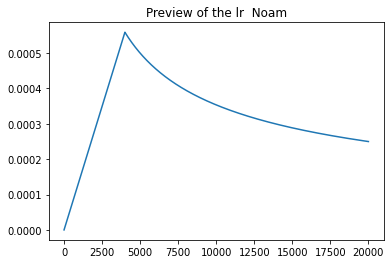

In [13]:
Informer.preview_noam()

In [14]:
Informer.val_every=True

In [ ]:
Informer.train(epochs=20, train_all=True, f='../../stock_price/train\\20190723_20190731.hdf',
            val_size=0.2, test_round=2, save='train',patience=40)

  0%|          | 0/20 [00:00<?, ?it/s]

After training train\20190401_20190412  Train_loss:1.169723 R2:0.029819 | Val_Loss:0.748445 |R2:0.378999 |Rate:0.701 |lr:0.000222
After training train\20190412_20190424  Train_loss:0.815775 R2:0.379470 | Val_Loss:0.755283 |R2:0.444159 |Rate:0.706 |lr:0.000444
After training train\20190425_20190510  Train_loss:0.898032 R2:0.439447 | Val_Loss:0.896557 |R2:0.449994 |Rate:0.702 |lr:0.000513
After training train\20190510_20190522  Train_loss:0.709015 R2:0.430073 | Val_Loss:0.680859 |R2:0.461513 |Rate:0.703 |lr:0.000447
After training train\20190523_20190604  Train_loss:0.553911 R2:0.441728 | Val_Loss:0.527427 |R2:0.469828 |Rate:0.712 |lr:0.000404
After training train\20190604_20190617  Train_loss:0.367920 R2:0.437699 | Val_Loss:0.355564 |R2:0.462723 |Rate:0.705 |lr:0.000371
After training train\20190617_20190628  Train_loss:0.389574 R2:0.411103 | Val_Loss:0.372655 |R2:0.433804 |Rate:0.701 |lr:0.000345
After training train\20190628_20190710  Train_loss:0.284733 R2:0.446861 | Val_Loss:0.27865